[View in Colaboratory](https://colab.research.google.com/github/joheras/CLoDSA/blob/master/notebooks/CLODSA_Instance_Segmentation_Ignore_Classes.ipynb)

# Augmenting a dataset for instance segmentation ignoring some classes

In this notebook, we illustrate how CLODSA can be employed to augment a dataset of images devoted to instance segmentation that was annotated using the [COCO format](http://cocodataset.org/#home). In addition, we will ignore some of the classes of the dataset. 

We will use a small dataset of shapes. 

In [1]:
!wget https://www.dropbox.com/s/sjt0lo4p0dah54m/shapes-bis.zip?dl=0 -O shapes-bis.zip
!unzip shapes-bis.zip

--2019-08-29 09:20:37--  https://www.dropbox.com/s/sjt0lo4p0dah54m/shapes-bis.zip?dl=0
Resolviendo www.dropbox.com (www.dropbox.com)... 162.125.68.1, 2620:100:6024:1::a27d:4401
Conectando con www.dropbox.com (www.dropbox.com)[162.125.68.1]:443... conectado.
Petición HTTP enviada, esperando respuesta... 301 Moved Permanently
Ubicación: /s/raw/sjt0lo4p0dah54m/shapes-bis.zip [siguiente]
--2019-08-29 09:20:37--  https://www.dropbox.com/s/raw/sjt0lo4p0dah54m/shapes-bis.zip
Reutilizando la conexión con www.dropbox.com:443.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://uc0dfb5a815d611ff0daedc8feea.dl.dropboxusercontent.com/cd/0/inline/Ang9Ji2YZkd8WTFPxcKsWzZxu0yQg3EUsHYtZlvOWh03y67FgcnEXaMio9kvyoOYX101sjkrcpo6mfyEAmJssE0Wp1WtzaFNgjdbZUw6XE6Y8oTaBByyRaIALhLKAWjJKUM/file# [siguiente]
--2019-08-29 09:20:38--  https://uc0dfb5a815d611ff0daedc8feea.dl.dropboxusercontent.com/cd/0/inline/Ang9Ji2YZkd8WTFPxcKsWzZxu0yQg3EUsHYtZlvOWh03y67FgcnEXaMio9kvyoOYX101sjkrcpo6mfyEAmJss

We can check the elements of the shapes folder that are a json file with the coco annotation and two images.

In [3]:
!ls shapes-bis/

1000.jpeg  1046.jpeg  1116.jpeg  1140.jpeg  1182.jpeg  annotations.json


We create the output folder.

In [4]:
!mkdir output

## Augmentation techniques

For this example, we consider three augmentation techniques. 

The augmentation techniques applied in this example are:
- Rotation.
- Flip.

## Installing the necessary libraries

In case that CLODSA is not installed in your system, the first task consists in installing it using ``pip``.

In [1]:
!pip install clodsa

  Running setup.py bdist_wheel for clodsa ... done
  Stored in directory: /home/jonathan/.cache/pip/wheels/8e/43/d7/77b5712fb239c468ccb0f8c9af9e6d1becda97134a31e39a9f
Successfully built clodsa
  Found existing installation: clodsa 1.2.28
    Uninstalling clodsa-1.2.28:
      Successfully uninstalled clodsa-1.2.28
You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Loading the necessary libraries

The first step in the pipeline consists in loading the necessary libraries to apply the data augmentation techniques in CLODSA.

In [5]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

/home/jonathan/.virtualenvs/cv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/jonathan/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jonathan/.virtualenvs/cv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jonathan/.virtual

## Creating the augmentor object

As explained in the documentation of CLODSA, we need to specify some parameters for the augmentation process, and use them to create an augmentor object.  

_The kind of problem_. In this case, we are working in an instance segmentation problem.

In [6]:
PROBLEM = "instance_segmentation"

_The annotation mode_. The annotation is provided using the coco format in a file called annotations.json. 

In [7]:
ANNOTATION_MODE = "coco"

_The input path_. The input path containing the images. 

In [17]:
INPUT_PATH = "shapes-bis"

_The generation mode_. In this case, linear, that is, all the augmentation techniques are applied to all the images of the original dataset. 

In [18]:
GENERATION_MODE = "linear"

_The output mode_. The generated images will be stored in a new folder called output.  

In [19]:
OUTPUT_MODE = "coco"
OUTPUT_PATH= "output/"

In our dataset, there are three classes with ids 1, 2, and 3. We are going to ignore the class 3. To that aim, we create the following set.

In [20]:
IGNORE_CLASSES = {3}

Using the above information, we can create our augmentor object. 

In [21]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,
                            {"outputPath":OUTPUT_PATH,"ignoreClasses":IGNORE_CLASSES})

## Adding the augmentation techniques

Now, we define the techniques that will be applied in our augmentation process and add them to our augmentor object. To illustrate the transformations, we will use the following image of the dataset. 



First of all, we must define a transformer generator.

In [22]:
transformer = transformerGenerator(PROBLEM)

_Rotations:_

In [23]:
for angle in [90,180]:
    rotate = createTechnique("rotate", {"angle" : angle})
    augmentor.addTransformer(transformer(rotate))

_Flips:_

In [24]:
flip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(flip))

## Applying the augmentation process

Finally, we apply the augmentation process (this might take some time depending on the number of images of the original dataset and the number of transformations that will be applied). 

In [25]:
augmentor.applyAugmentation()

We can now check the elements of the output folder. 

In [26]:
!ls output/

0_1000.jpeg  0_1140.jpeg  1_1116.jpeg  2_1000.jpeg  2_1182.jpeg
0_1046.jpeg  0_1182.jpeg  1_1140.jpeg  2_1116.jpeg  annotation.json
0_1116.jpeg  1_1000.jpeg  1_1182.jpeg  2_1140.jpeg


Finally, we can visualize the results using some of the tools provided by [the COCO API](https://github.com/cocodataset/cocoapi).

In [14]:
!pip install pycocotools

You are using pip version 18.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [16]:
image_directory = 'output/'
annotation_file = 'output/annotation.json'

In [17]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [18]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
square circle triangle

Custom COCO supercategories: 
shape


Each execution of the following cells show a different image of the output dataset.

In [19]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [20]:
image_data

{'id': 3,
 'file_name': '2_1000.jpeg',
 'width': 128,
 'height': 128,
 'date_captured': '',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

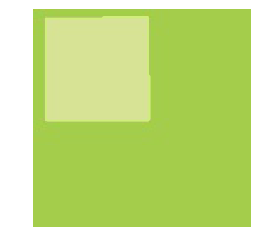

In [21]:
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

If you are executing this notebook in Colaboratory, you need to download the generated files. To that aim, you can create a zip folder and download it using the following commands. 

In [ ]:
!zip -r shapes.zip output
from google.colab import files
files.download('shapes.zip')